#### Relationship between annual leave taken and bonus

##### 1. Get data from the database
* First we get the required data by SQL query on the database

* The managers in which all of them have 0 bonus are excluded, assuming they were only responsible for managing the Sales Representative and did not get bonus which makes them irrelevant to the question

In [86]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the float number display format to 2 decimal places for readability
pd.set_option('display.float_format', '{:.2f}'.format)

# Create connection to the database
connection_string = ("Driver={SQL Server};"
            "Server=FUNGLAP\SERVER1;"
            "Database=AdventureWorks2019;"
            "Trusted_Connection=yes;")
connection = pyodbc.connect(connection_string)

# Get the values of annual leave in the unit of hour and the corresponding bonus
#   by SQL query
hour_bonus = pd.read_sql(
    """
    SELECT
        e.VacationHours AS vacation_hours,
        sp.Bonus AS bonus,
        e.JobTitle As job_title
    FROM [Sales].[SalesPerson] AS sp
        INNER JOIN [HumanResources].[Employee] AS e
            ON sp.BusinessEntityID = e.BusinessEntityID
    WHERE
        NOT (
            e.JobTitle LIKE '%Manager' AND
            sp.Bonus = 0
            )
    ORDER BY vacation_hours DESC
    """, connection)

hour_bonus

C:\Users\freef\AppData\Local\Temp\ipykernel_29544\1342723068.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hour_bonus = pd.read_sql(


,vacation_hours,bonus,job_title
0,39,3900.00,Sales Representative
1,38,4100.00,Sales Representative
2,37,5150.00,Sales Representative
3,36,5650.00,Sales Representative
4,35,75.00,Sales Representative
5,34,985.00,Sales Representative
6,33,500.00,Sales Representative
7,31,5000.00,Sales Representative
8,29,6700.00,Sales Representative
9,27,2000.00,Sales Representative


In [87]:
# Examine the DataFrame `hour_bonus`
print(hour_bonus.info())
print(hour_bonus.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   vacation_hours  14 non-null     int64  
 1   bonus           14 non-null     float64
 2   job_title       14 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 468.0+ bytes
None
       vacation_hours   bonus
count           14.00   14.00
mean            31.00 3472.14
std              5.83 2017.28
min             22.00   75.00
25%             26.25 2125.00
50%             32.00 3725.00
75%             35.75 5000.00
max             39.00 6700.00


* From the above statistics data, `vacation_hours` appears to have a relatively narrow range of values and distributed around the mean, while `bonus` has a wider range with larger variability

##### 2. Data visualisation

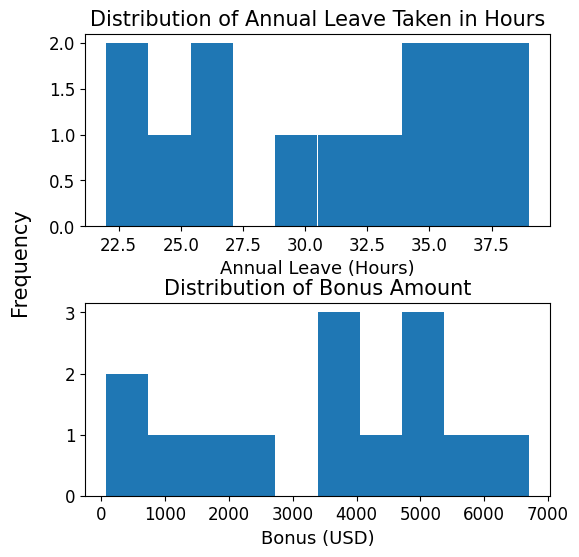

In [88]:
# Create histograms for `vacation_hours` and `bonus`
x = hour_bonus[["vacation_hours"]]
y = hour_bonus[["bonus"]]
fig, axs = plt.subplots(2, 1, figsize=(6, 6), gridspec_kw={'hspace': 0.4})

# Plot the first histogram and customerize it
axs[0].hist(x)
axs[0].set_xlabel('Annual Leave (Hours)', fontsize = 13)
axs[0].set_title('Distribution of Annual Leave Taken in Hours', fontsize = 15)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Plot the second histogram and customerize it
axs[1].hist(y)
axs[1].set_xlabel('Bonus (USD)', fontsize = 13)
axs[1].set_title('Distribution of Bonus Amount', fontsize = 15)
axs[1].tick_params(axis='both', which='major', labelsize=12)

# Add a y-axis label to the whole figure
fig.text(0, 0.5, 'Frequency', va='center', rotation='vertical', size=15)

# Show the figure
plt.show()

In [89]:
# Create a function for showing the linear regression line and
#   the R-squared value on the graph
def reg_line(x, y, textx, texty, xlog, ylog):
    '''
    Draw linear regression line on the plot and show the R-squared values
    for linear or logarithmic scale on any of the axes
    '''
    # Import the function for drawing the linear regression line
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    x_log=np.log(x)
    y_log = np.log(y)
    
    # Check if logarithmic scale is required, show the R-squared value
    if xlog and ylog:
        reg.fit(x_log, y_log)
        yhat = np.exp(reg.predict(x_log))
        plt.text(textx,texty, r'$R^2$ = {:.3f}'.format(reg.score(x_log,y_log)),
                transform=plt.gca().transAxes, color='orange', fontsize = 25)
    elif xlog:
        reg.fit(x_log, y)
        yhat = reg.predict(x_log)
        plt.text(textx,texty, r'$R^2$ = {:.3f}'.format(reg.score(x_log,y)),
                transform=plt.gca().transAxes, color='orange', fontsize=25)
    elif ylog:
        reg.fit(x, y_log)
        yhat = np.exp(reg.predict(x))
        plt.text(textx,texty, r'$R^2$ = {:.3f}'.format(reg.score(x,y_log)),
                transform=plt.gca().transAxes, color='orange', fontsize=25)
    else:
        reg.fit(x, y)
        yhat = reg.predict(x)
        plt.text(textx,texty, r'$R^2$ = {:.3f}'.format(reg.score(x,y)),
                transform=plt.gca().transAxes, color='orange', fontsize=25)
    
    # plot the linear regression line and other customerization
    plt.plot(x, yhat, c='orange', alpha=0.6, lw=5)
    plt.tick_params(axis='both', which='major', labelsize=14.8)
    plt.tick_params(axis='both', which='minor', labelsize=14.8)
    plt.grid(alpha=0.3)

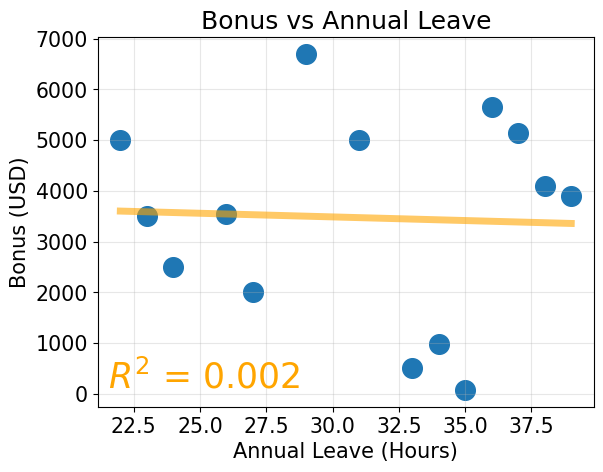

In [90]:
# Create a scatter plot
plt.scatter(x, y, s=200)
reg_line(x, y, 0.02, 0.05, False, False)

# Customerize and show the plot
plt.xlabel('Annual Leave (Hours)', fontsize=15)
plt.ylabel('Bonus (USD)', fontsize=15)
plt.title('Bonus vs Annual Leave', fontsize=18)
plt.show()

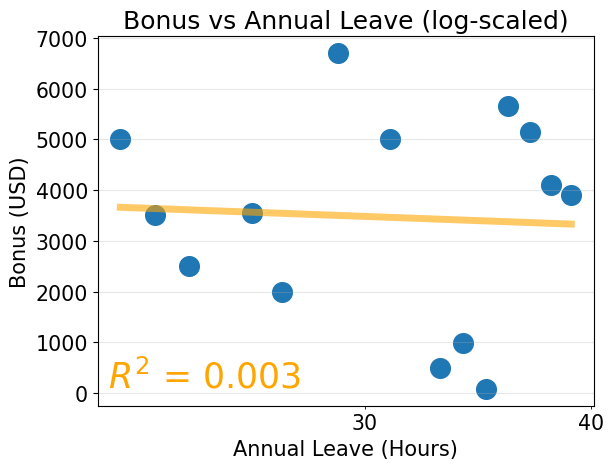

In [91]:
# Create a scatter plot with x-axis in logarithmic scale
plt.scatter(x, y, s=200)
plt.xscale('log')

# Show the linear regression line
reg_line(x, y, 0.02, 0.05, True, False)

# Disable scientific notation
from matplotlib.ticker import ScalarFormatter
ScalarFormatter().set_scientific(False)  
ScalarFormatter().set_useOffset(False)
plt.gca().xaxis.set_minor_formatter(ScalarFormatter())

# Customerize and show the plot
plt.xlabel('Annual Leave (Hours)', fontsize=15)
plt.ylabel('Bonus (USD)', fontsize=15)
plt.title('Bonus vs Annual Leave (log-scaled)', fontsize=18)
plt.show()

C:\Users\freef\AppData\Local\Temp\ipykernel_29544\2275761825.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


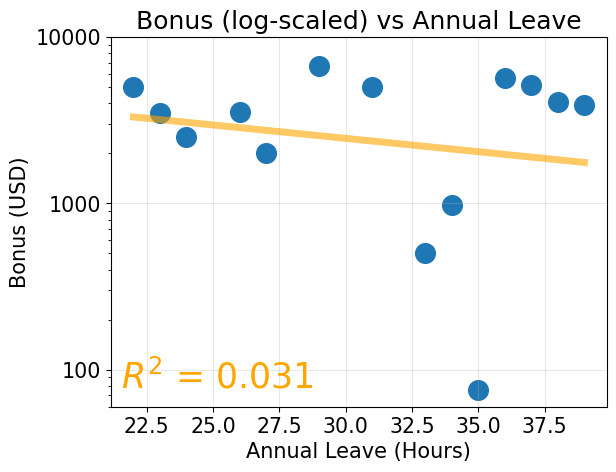

In [92]:
# Create a scatter plot with y-axis in logarithmic scale
plt.scatter(x, y, s=200)
plt.yscale('log')

# Show the linear regression line
reg_line(x, y, 0.02, 0.05, False, True)

# Disable scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Customerize and show the plot
plt.ylim(0,10000)
plt.xlabel('Annual Leave (Hours)', fontsize=15)
plt.ylabel('Bonus (USD)', fontsize=15)
plt.title('Bonus (log-scaled) vs Annual Leave', fontsize=18)
plt.show()

C:\Users\freef\AppData\Local\Temp\ipykernel_29544\299845478.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


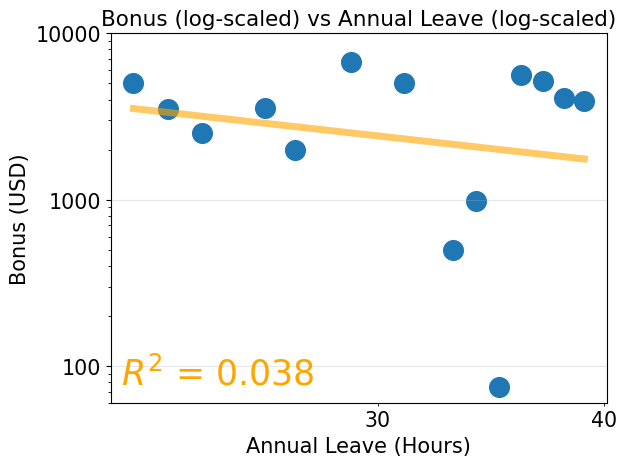

In [93]:
# Create a scatter plot with both axes in logarithmic scale
plt.scatter(x, y, s=200)
plt.xscale('log')
plt.yscale('log')

# Show the linear regression line
reg_line(x, y, 0.02, 0.05, True, True)

# Disable scientific notation
plt.gca().xaxis.set_minor_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Customerize and show the plot
plt.ylim(0,10000)
plt.xlabel('Annual Leave (Hours)', fontsize=15)
plt.ylabel('Bonus (USD)', fontsize=15)
plt.title('Bonus (log-scaled) vs Annual Leave (log-scaled)', fontsize=15.5)
plt.show()

##### 3. Conclusion
* The data points are scattered in ranges where no obvious groups or patterns can be found
* All the R-squared values are very close to zero, indicating a very low linear correlation between the variables
* It can be concluded that there is no correlation between the annual leave taken and bonus